In [ ]:
model <- list()
model$obj        <- c(36,82,29,16,56,61,48,41)
model$modelsense <- "max"
model$rhs        <- c(300,40)
model$sense      <- c('<=','<=')
model$vtype      <- "B"
model$A          <- matrix(c(60,110,53,47,92,85,73,65,
                             7,9,8,4,7,6,8,5),nrow=2,byrow=T)
# Set poolsearch parameters
params                <- list()
params$PoolSolutions  <- 10
params$PoolGap        <- 0
params$PoolSearchMode <- 2

result <- gurobi(model, params,list())
result$pool


result.pool.matrix=matrix(nrow=8,ncol=8)
for (i in 1:8)
{result.pool.matrix[i,]=result$pool[[i]]$xn
}
round(result.pool.matrix)

In [2]:
import pandas as pd
import numpy as np
from gurobipy import *
from IPython.display import Image 

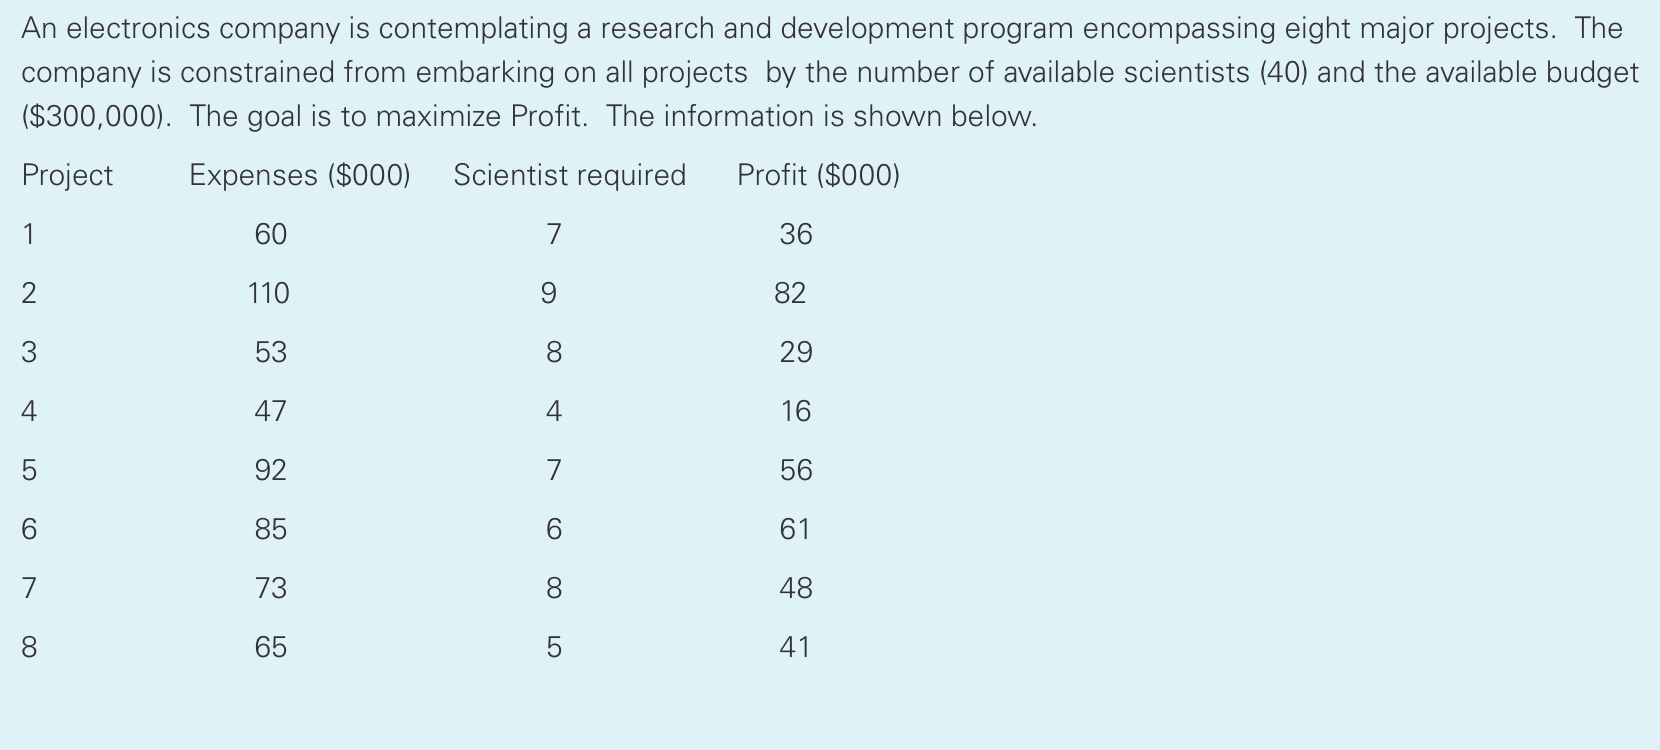

In [5]:
pil_img = Image(filename='/Users/thomasgow/Documents/IAA/Optimization/quiz2.png')
display(pil_img)

Create the model

In [17]:
m=Model('Quiz 2 Model')

Create variables

In [25]:
projects = ["Project1", "Project2", "Project3", "Project4", "Project5", \
            "Project6", "Project7", "Project8"]
expenses = [60, 110, 53, 47, 92, 85, 73, 65]
scienists_required = [7, 9, 8, 4, 7, 6, 8, 5]
profit = [36, 82, 29, 16, 56, 61, 48, 41]

In [23]:
project_expenses = {
    "Project1": 60,
    "Project2": 110,
    "Project3": 53,
    "Project4": 47,
    "Project5": 92,
    "Project6": 85,
    "Project7": 73,
    "Project8": 65
}

project_scientists = {
    "Project1": 7,
    "Project2": 9,
    "Project3": 8,
    "Project4": 4,
    "Project5": 7,
    "Project6": 6,
    "Project7": 8,
    "Project8": 5
}

project_profit = {
    "Project1": 36,
    "Project2": 82,
    "Project3": 29,
    "Project4": 16,
    "Project5": 56,
    "Project6": 61,
    "Project7": 48,
    "Project8": 41
}


KeyError: 'Duplicate keys in Model.addVars()'

In [ ]:
p=m.addVars(projects, vtype=GRB.INTEGER, name='projects')

In [ ]:
available_budget = 300,000
scientist_Capacity = 100

Update the model with the new vairables.

In [ ]:
m.update()

# Capacity
model.addConstrs((quicksum(time_table[machine][product] * manu[time_period, product] 
	for product in time_table[machine]) <= hoursPerMonth * (qMachine[machine] - 
	down[time_period, machine]) for machine in machines for time_period in time_periods 
	if (time_period, machine) in down), name = "Capacity")

## Set Objective
Max profit: 36p1+82p2+29p3+16p4+56p5+61p6+48p7+41p8

In [ ]:
m.setObjective(36p1+82p2+29p3+16p4+56p5+61p6+48p7+41p8,GRB.MAXIMIZE)

Add Constraints

In [ ]:
m.addConstr(x_1<=4,'c0')
m.addConstr(2*x_2<=12,'c1')
m.addConstr(3*x_1+2*x_2<=18,'c2')

Run the model

In [ ]:
m.optimize()

In [ ]:
print('obj:%d'%m.objVal)
for v in m.getVars():
    print('%s:%d'%(v.varName,v.x))

In [ ]:
model.ObjVal

In [ ]:
from gurobipy import *

# Warehouse demand in thousands of units
demand = [15, 18, 14, 20]

# Plant capacity in thousands of units
capacity = [20, 22, 17, 19, 18]

# Fixed costs for each plant
fixedCosts = [12000, 15000, 17000, 13000, 16000]

# Transportation costs per thousand units
transCosts = [[4000, 2000, 3000, 2500, 4500],
              [2500, 2600, 3400, 3000, 4000],
              [1200, 1800, 2600, 4100, 3000],
              [2200, 2600, 3100, 3700, 3200]]

# Range of plants and warehouses
plants = range(len(capacity))
warehouses = range(len(demand))

# Model
m = Model("facility")

# Plant open decision variables: open[p] == 1 if plant p is open.
open = m.addVars(plants,
                 vtype=GRB.BINARY,
                 obj=fixedCosts,
                 name="open")

# Transportation decision variables: transport[w,p] captures the
# optimal quantity to transport to warehouse w from plant p
transport = m.addVars(warehouses, plants, obj=transCosts, name="trans")

# You could use Python looping constructs and m.addVar() to create
# these decision variables instead.  The following would be equivalent
# to the preceding two statements...
#
#open = []
#for p in plants:
#  open.append(m.addVar(vtype=GRB.BINARY,
#                       obj=fixedCosts[p],
#                       name="open[%d]" % p))
#
#transport = []
#for w in warehouses:
#  transport.append([])
#  for p in plants:
#    transport[w].append(m.addVar(obj=transCosts[w][p],
#                                 name="trans[%d,%d]" % (w, p)))

# The objective is to minimize the total fixed and variable costs
m.modelSense = GRB.MINIMIZE

# Production constraints
# Note that the right-hand limit sets the production to zero if the plant
# is closed
m.addConstrs(
    (transport.sum('*',p) <= capacity[p]*open[p] for p in plants),
    "Capacity")

# Using Python looping constructs, the preceding would be...
#
#for p in plants:
#  m.addConstr(sum(transport[w][p] for w in warehouses) <= capacity[p] * open[p],
#              "Capacity[%d]" % p)

# Demand constraints
m.addConstrs(
    (transport.sum(w) == demand[w] for w in warehouses),
    "Demand")

# ... and the preceding would be ...
#for w in warehouses:
#  m.addConstr(sum(transport[w][p] for p in plants) == demand[w], "Demand[%d]" % w)

# Save model
m.write('facilityPY.lp')

# Guess at the starting point: close the plant with the highest fixed costs;
# open all others

# First, open all plants
for p in plants:
    open[p].start = 1.0

# Now close the plant with the highest fixed cost
print('Initial guess:')
maxFixed = max(fixedCosts)
for p in plants:
    if fixedCosts[p] == maxFixed:
        open[p].start = 0.0
        print('Closing plant %s' % p)
        break
print('')

# Use barrier to solve root relaxation
m.Params.method = 2

# Solve
m.optimize()

# Print solution
print('\nTOTAL COSTS: %g' % m.objVal)
print('SOLUTION:')
for p in plants:
    if open[p].x > 0.99:
        print('Plant %s open' % p)
        for w in warehouses:
            if transport[w,p].x > 0:
                print('  Transport %g units to warehouse %s' % \
                      (transport[w,p].x, w))
    else:
        print('Plant %s closed!' % p)